In [33]:
# import library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# load dataset

dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [35]:
# x- unsupervised iloc=integer location

x=dataset.iloc[:,[3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [36]:
# 1. Finding number of clusters using Kernel Density Estimation

# 2. Finding number of clusters using Bandwidth


from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(x, quantile=0.1, n_samples=200)

# If quantile=0.1 then n_clusters=7
# If quantile=0.2 then n_clusters=3
# f quantile=0.3 then n_clusters=1

# Model creation
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(x)

labels = ms.labels_
print("cluser_group : \n", labels)

cluster_centers = ms.cluster_centers_
print("Cluster centroids: \n", cluster_centers)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : " , n_clusters_)

cluser_group : 
 [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 0 3 0 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 5 2 5 2
 5 2 5 2 5 6 5 6 5 6 5 6 5 6 5]
Cluster centroids: 
 [[ 54.81818182  49.88311688]
 [ 77.88888889  83.37037037]
 [ 80.18181818  12.68181818]
 [ 24.75        75.375     ]
 [ 24.58333333   9.58333333]
 [115.5         82.25      ]
 [127.66666667  20.66666667]]
number of estimated clusters :  7


In [37]:
# Add cluster group in existing dataset

supervised=pd.DataFrame(dataset)
supervised['Cluster_group']=labels
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,5
196,197,Female,45,126,28,6
197,198,Male,32,126,74,5
198,199,Male,32,137,18,6


In [38]:
# save new cluster_group in new .csv file

supervised.to_csv("3. Mean Shift Cluster_group.csv")

F:\Anaconda\envs\aiml\Lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
F:\Anaconda\envs\aiml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda\envs\aiml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


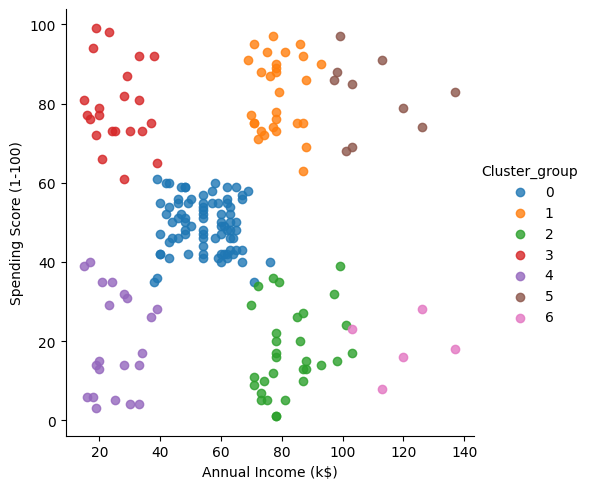

In [24]:
# Output - sea born - Data visualization

import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4], hue=supervised.columns[5],
                fit_reg=False, legend=True, legend_out=True)